# Looking at surface fluxes

In [48]:
import cosima_cookbook as cc
from dask.distributed import Client

import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm
import numpy as np
%matplotlib inline
from collections import OrderedDict

# Stop annoying warnings coming out of xarray.
import warnings
warnings.filterwarnings('ignore')

In [2]:
client = Client()
client

<Client: 'tcp://127.0.0.1:46827' processes=7 threads=28, memory=112.00 GiB>

In [3]:
session_CM2 = cc.database.create_session('/g/data/p73/archive/non-CMIP/ACCESS-CM2/CM2.db')
control     = 'cj877'

In [33]:
# OM2 database
#session_OM2  = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
session_OM2  = cc.database.create_session(db='/g/data/ik11/databases/cosima_master_2022-07-01.db')
expt_OM2_025 = '025deg_jra55_ryf9091_gadi'
expt_OM2_1   = '1deg_jra55_ryf9091_gadi'

If you get a 'read-only database' warning, it is because the database has not finished building. 

In [34]:
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'

In [35]:
# Plotting info
ft_size = 16
plt.rcParams.update({'font.size': ft_size})

### Surface fluxes

**tau_x**: i-directed wind stress forcing u-velocity (N/m^2)

**net_sfc_heating**: surface ocean heat flux coming through coupler and mass transfer (Watts/m^2)

**lw_heat**: longwave flux into ocean (<0 cools ocean) (W/m^2)

**swflx**: shortwave flux into ocean (<0 cools ocean) (W/m^2)

**sens_heat**: sensible heat into ocean (<0 cools ocean) (W/m^2)

**evap_heat**: latent heat flux into ocean (<0 cools ocean) (W/m^2)

**pme_river**: mass flux of precip-evap+river via sbc (liquid, frozen, evaporation) ((kg/m^3)*(m/sec))


In [ ]:
# Fluxes to plot
vs = {'tau_x':{'vmin':-0.2,'vmax': 0.2,'cmap':'RdBu_r'},
      'net_sfc_heating':{'vmin':-200.,'vmax': 200.,'cmap':'RdBu_r'},
      'lw_heat':{'vmin':-80.,'vmax': 0.,'cmap':cm.cm.haline},
      'swflx':{'vmin':0.,'vmax': 250.,'cmap':cm.cm.haline},
      'sens_heat':{'vmin':-100.,'vmax': 0.,'cmap':cm.cm.haline},
      'evap_heat':{'vmin':-250.,'vmax': 0.,'cmap':cm.cm.haline},
      'pme_river':{'vmin':-0.0002,'vmax': 0.0002,'cmap':'RdBu_r'}}   

expt_name  = ['CM2-025', 'CM2-01', 'OM2-025', 'OM2-1']

exptdict = OrderedDict([
    ('CM2-025',  {'expt':'cj877', 'eqtimes':['0210-01-01','0219-01-01'], 'session':'session_CM2'}),
    ('OM2-025',  {'expt':'025deg_jra55_ryf9091_bgc', 'eqtimes':['2190-01-01','2199-01-01'], 'session':'session_OM2'}),
    ('OM2-1',  {'expt':'1deg_jra55_ryf9091_gadi', 'eqtimes':['2190-01-01','2199-01-01'], 'session':'session_OM2'})
])

fig, axes = plt.subplots(nrows=7,ncols=3,figsize=(30,50))
for i, ekey in enumerate(exptdict.keys()):
    expt  = exptdict[ekey]['expt']
    times = exptdict[ekey]['eqtimes']
    if i == 0:
        sess = session_CM2
    else:
        sess = session_OM2
    if i > 1:
        break
        
    for j,v in enumerate(vs.keys()):
        print(expt + ' ' + v)
        var = cc.querying.getvar(expt, v, sess, frequency='1 monthly').sel(time=slice(times[0],times[1])).mean('time')
        var.plot(ax=axes[j][i], vmin=vs[v]['vmin'], vmax=vs[v]['vmax'], cmap=vs[v]['cmap'])
        axes[j][i].set_title(ekey + ' ' + v)

cj877 tau_x


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, cal

cj877 net_sfc_heating
cj877 lw_heat
cj877 swflx
cj877 sens_heat
cj877 evap_heat
cj877 pme_river
025deg_jra55_ryf9091_bgc tau_x
025deg_jra55_ryf9091_bgc net_sfc_heating
025deg_jra55_ryf9091_bgc lw_heat
025deg_jra55_ryf9091_bgc swflx
025deg_jra55_ryf9091_bgc sens_heat
025deg_jra55_ryf9091_bgc evap_heat
025deg_jra55_ryf9091_bgc pme_river


In [65]:
from cosima_cookbook import explore
dbx = explore.DatabaseExplorer(session=session_OM2)
dbx

DatabaseExplorer(children=(HTML(value='<style>.header p{ line-height: 1.4; margin-bottom: 10px }</style>\n    …

Comparing CM2-025 different stages of interdecadal variability

In [20]:
# Load data
def get_fluxes(start_year, end_year):
    for j, v in enumerate(vs.keys()):
        print(start_year, '-', end_year, v)
        var = cc.querying.getvar(control, v, session_CM2, frequency='1 monthly').sel(time=slice(start_year+'-01-01', end_year+'-12-31')).mean('time')
        
        if j == 0:
            ds = var.to_dataset()
        else:
            ds[v] = var
    
    return ds

In [21]:
%%time
ds_0210_0219 = get_fluxes('0210', '0219')
ds_0260_0269 = get_fluxes('0260', '0269')

0210 - 0219 tau_x
0210 - 0219 net_sfc_heating
0210 - 0219 lw_heat
0210 - 0219 swflx
0210 - 0219 sens_heat
0210 - 0219 evap_heat
0210 - 0219 pme_river
0260 - 0269 tau_x
0260 - 0269 net_sfc_heating
0260 - 0269 lw_heat
0260 - 0269 swflx
0260 - 0269 sens_heat
0260 - 0269 evap_heat
0260 - 0269 pme_river
CPU times: user 2min 12s, sys: 8.77 s, total: 2min 21s
Wall time: 2min 44s


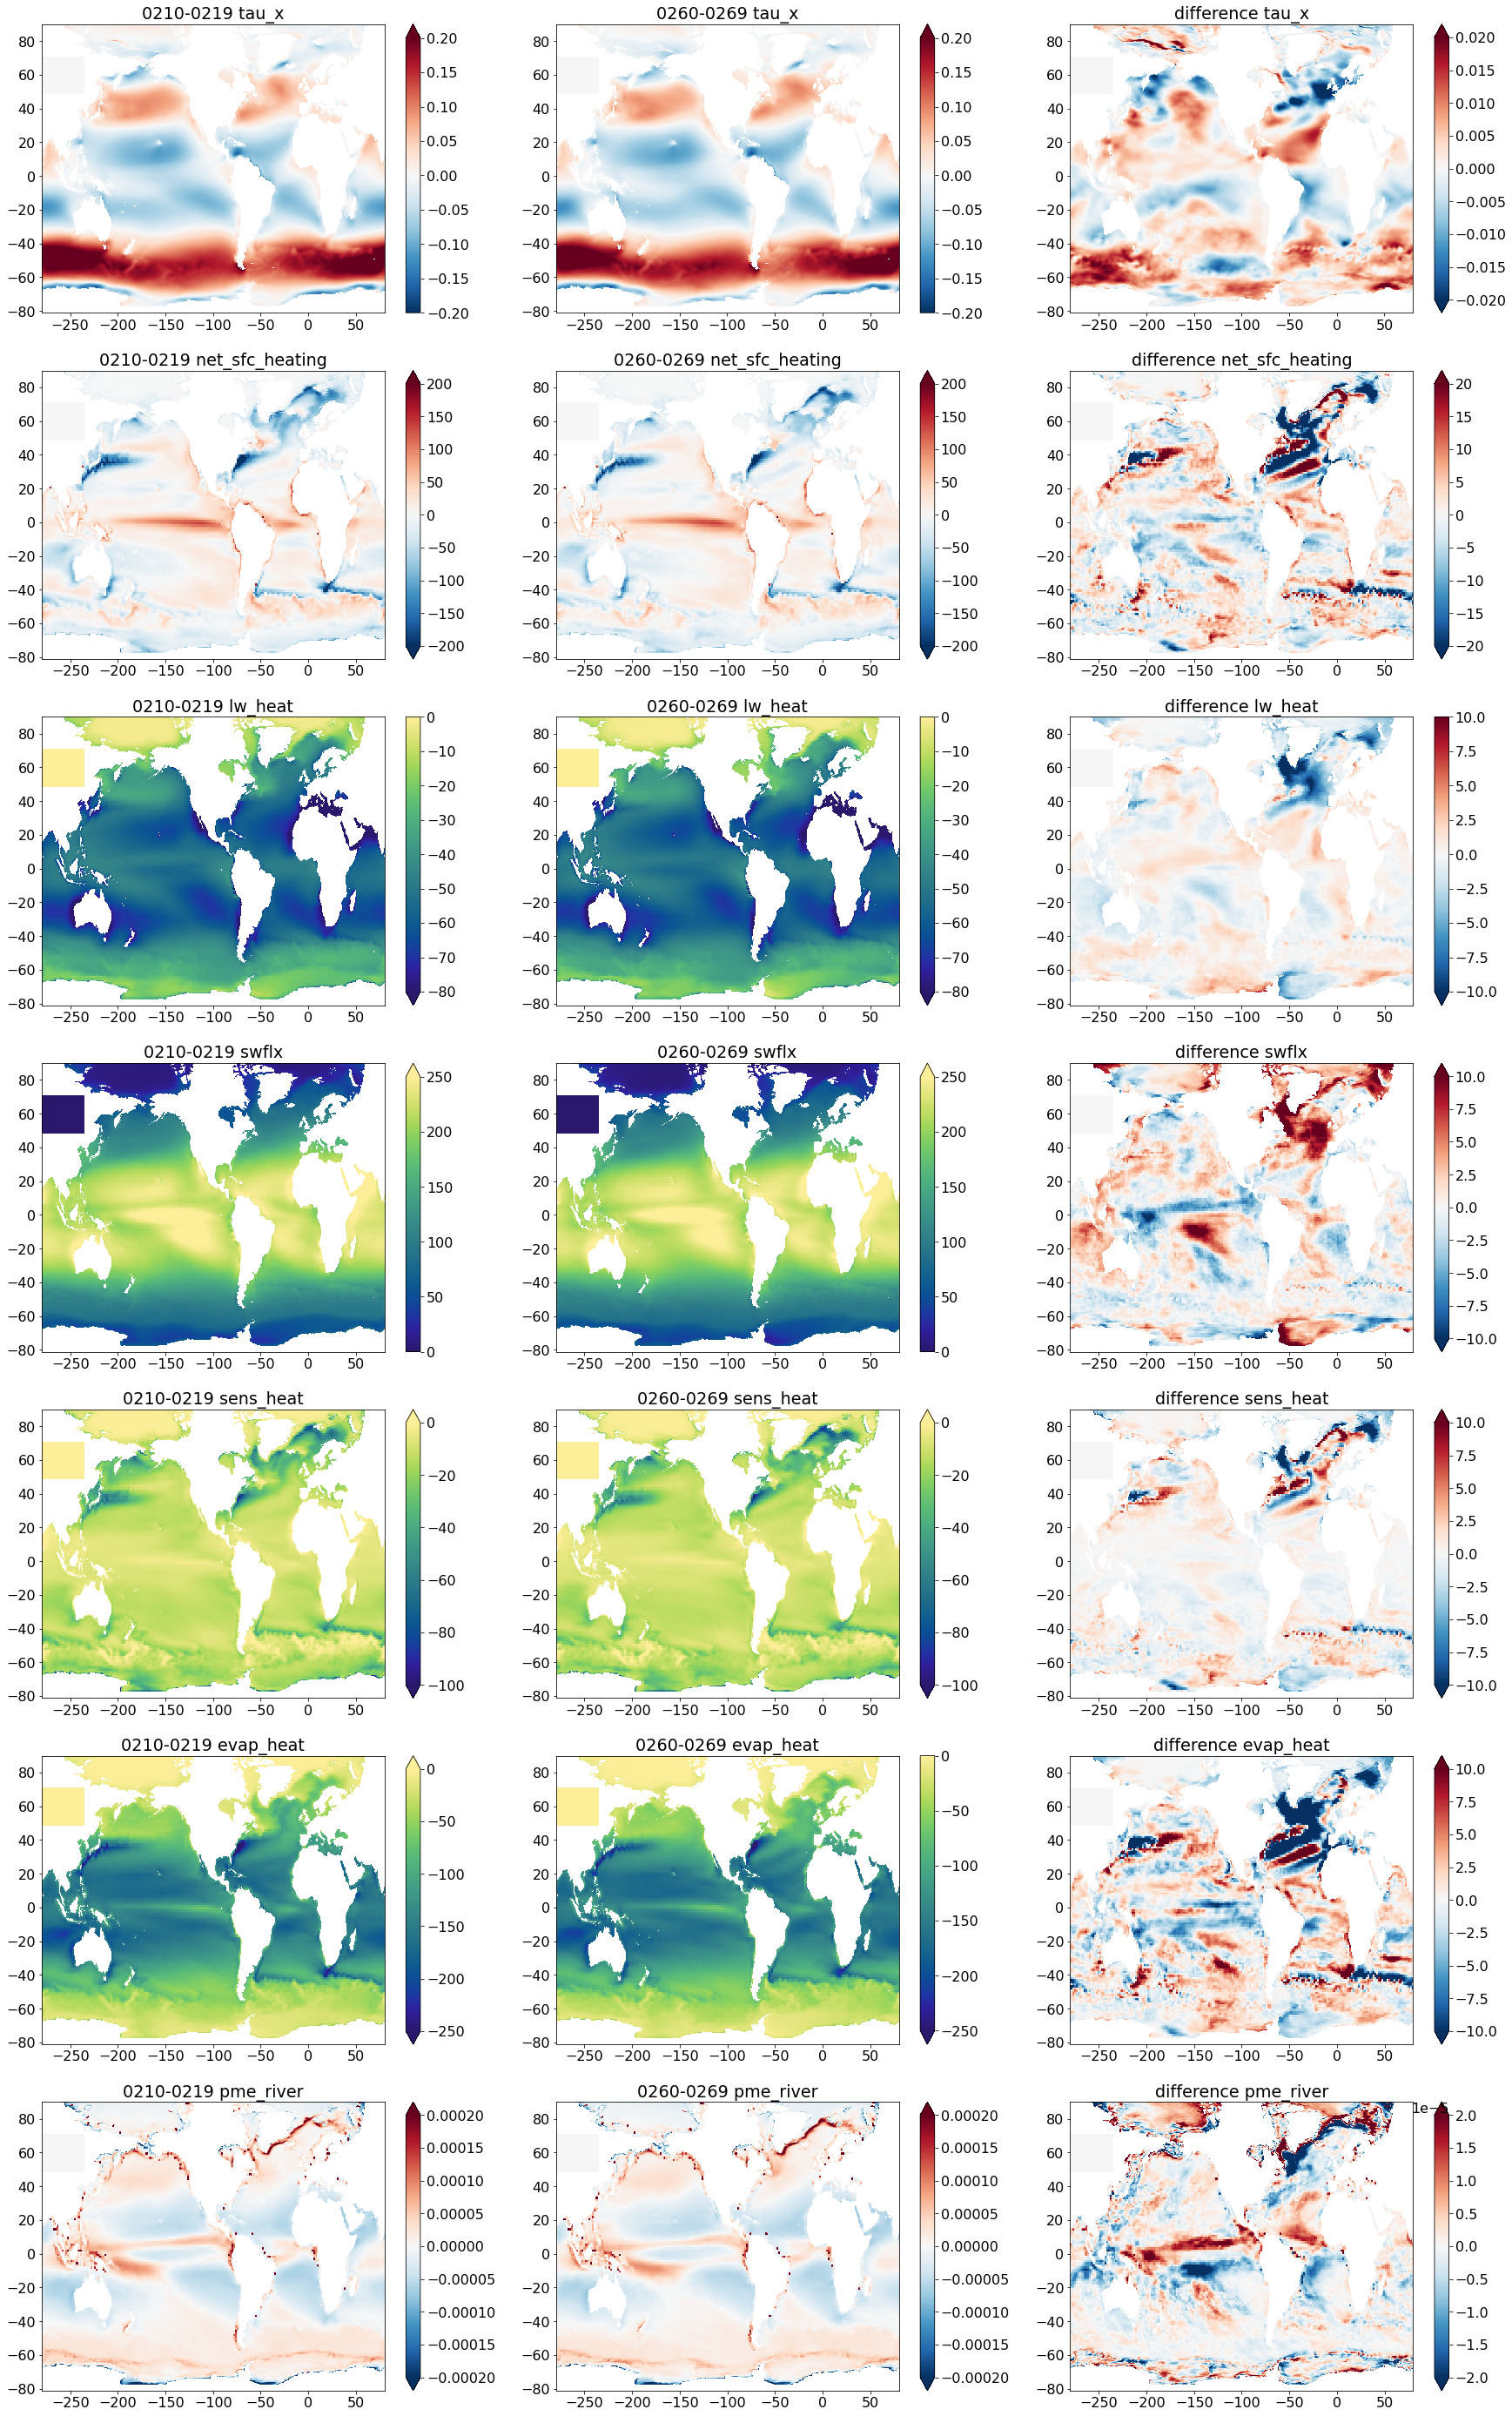

In [31]:
# Fluxes to plot
vs = {'tau_x':{'vmin':-0.2,'vmax': 0.2,'cmap':'RdBu_r'},
      'net_sfc_heating':{'vmin':-200.,'vmax': 200.,'cmap':'RdBu_r'},
      'lw_heat':{'vmin':-80.,'vmax': 0.,'cmap':cm.cm.haline},
      'swflx':{'vmin':0.,'vmax': 250.,'cmap':cm.cm.haline},
      'sens_heat':{'vmin':-100.,'vmax': 0.,'cmap':cm.cm.haline},
      'evap_heat':{'vmin':-250.,'vmax': 0.,'cmap':cm.cm.haline},
      'pme_river':{'vmin':-0.0002,'vmax': 0.0002,'cmap':'RdBu_r'}}   

fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(30,50))

# Decadal max years
i = 0
for j, v in enumerate(vs.keys()):
    ds_0210_0219[v].plot(ax=axes[j][i], vmin=vs[v]['vmin'], vmax=vs[v]['vmax'], cmap=vs[v]['cmap'], add_labels=False)
    axes[j][i].set_title('0210' + '-' + '0219' + ' ' + v)

# Decadal min years
i = 1
for j, v in enumerate(vs.keys()):
    ds_0260_0269[v].plot(ax=axes[j][i], vmin=vs[v]['vmin'], vmax=vs[v]['vmax'], cmap=vs[v]['cmap'], add_labels=False)
    axes[j][i].set_title('0260' + '-' + '0269' + ' ' + v)

# Difference
i = 2
vs_dif = {'tau_x':{'vmin':-0.02,'vmax': 0.02,'cmap':'RdBu_r'},
      'net_sfc_heating':{'vmin':-20.,'vmax': 20.,'cmap':'RdBu_r'},
      'lw_heat':{'vmin':-10.,'vmax': 10.,'cmap':cm.cm.haline},
      'swflx':{'vmin':-10.,'vmax': 10.,'cmap':cm.cm.haline},
      'sens_heat':{'vmin':-10.,'vmax': 10.,'cmap':cm.cm.haline},
      'evap_heat':{'vmin':-10.,'vmax': 10.,'cmap':cm.cm.haline},
      'pme_river':{'vmin':-0.00002,'vmax': 0.00002,'cmap':'RdBu_r'}}  
for j, v in enumerate(vs.keys()):
    (ds_0210_0219[v]-ds_0260_0269[v]).plot(ax=axes[j][i], vmin=vs_dif[v]['vmin'], vmax=vs_dif[v]['vmax'], cmap='RdBu_r', add_labels=False)
    axes[j][i].set_title('difference' + ' ' + v)


Decadal variability: (difference, max has...)
- less (zonal) wind
- more lw, evap, net heat loss
- higher sw


tau_x
net_sfc_heating
lw_heat
swflx
sens_heat
evap_heat
pme_river
tau_x
net_sfc_heating
lw_heat
swflx
sens_heat
evap_heat
pme_river


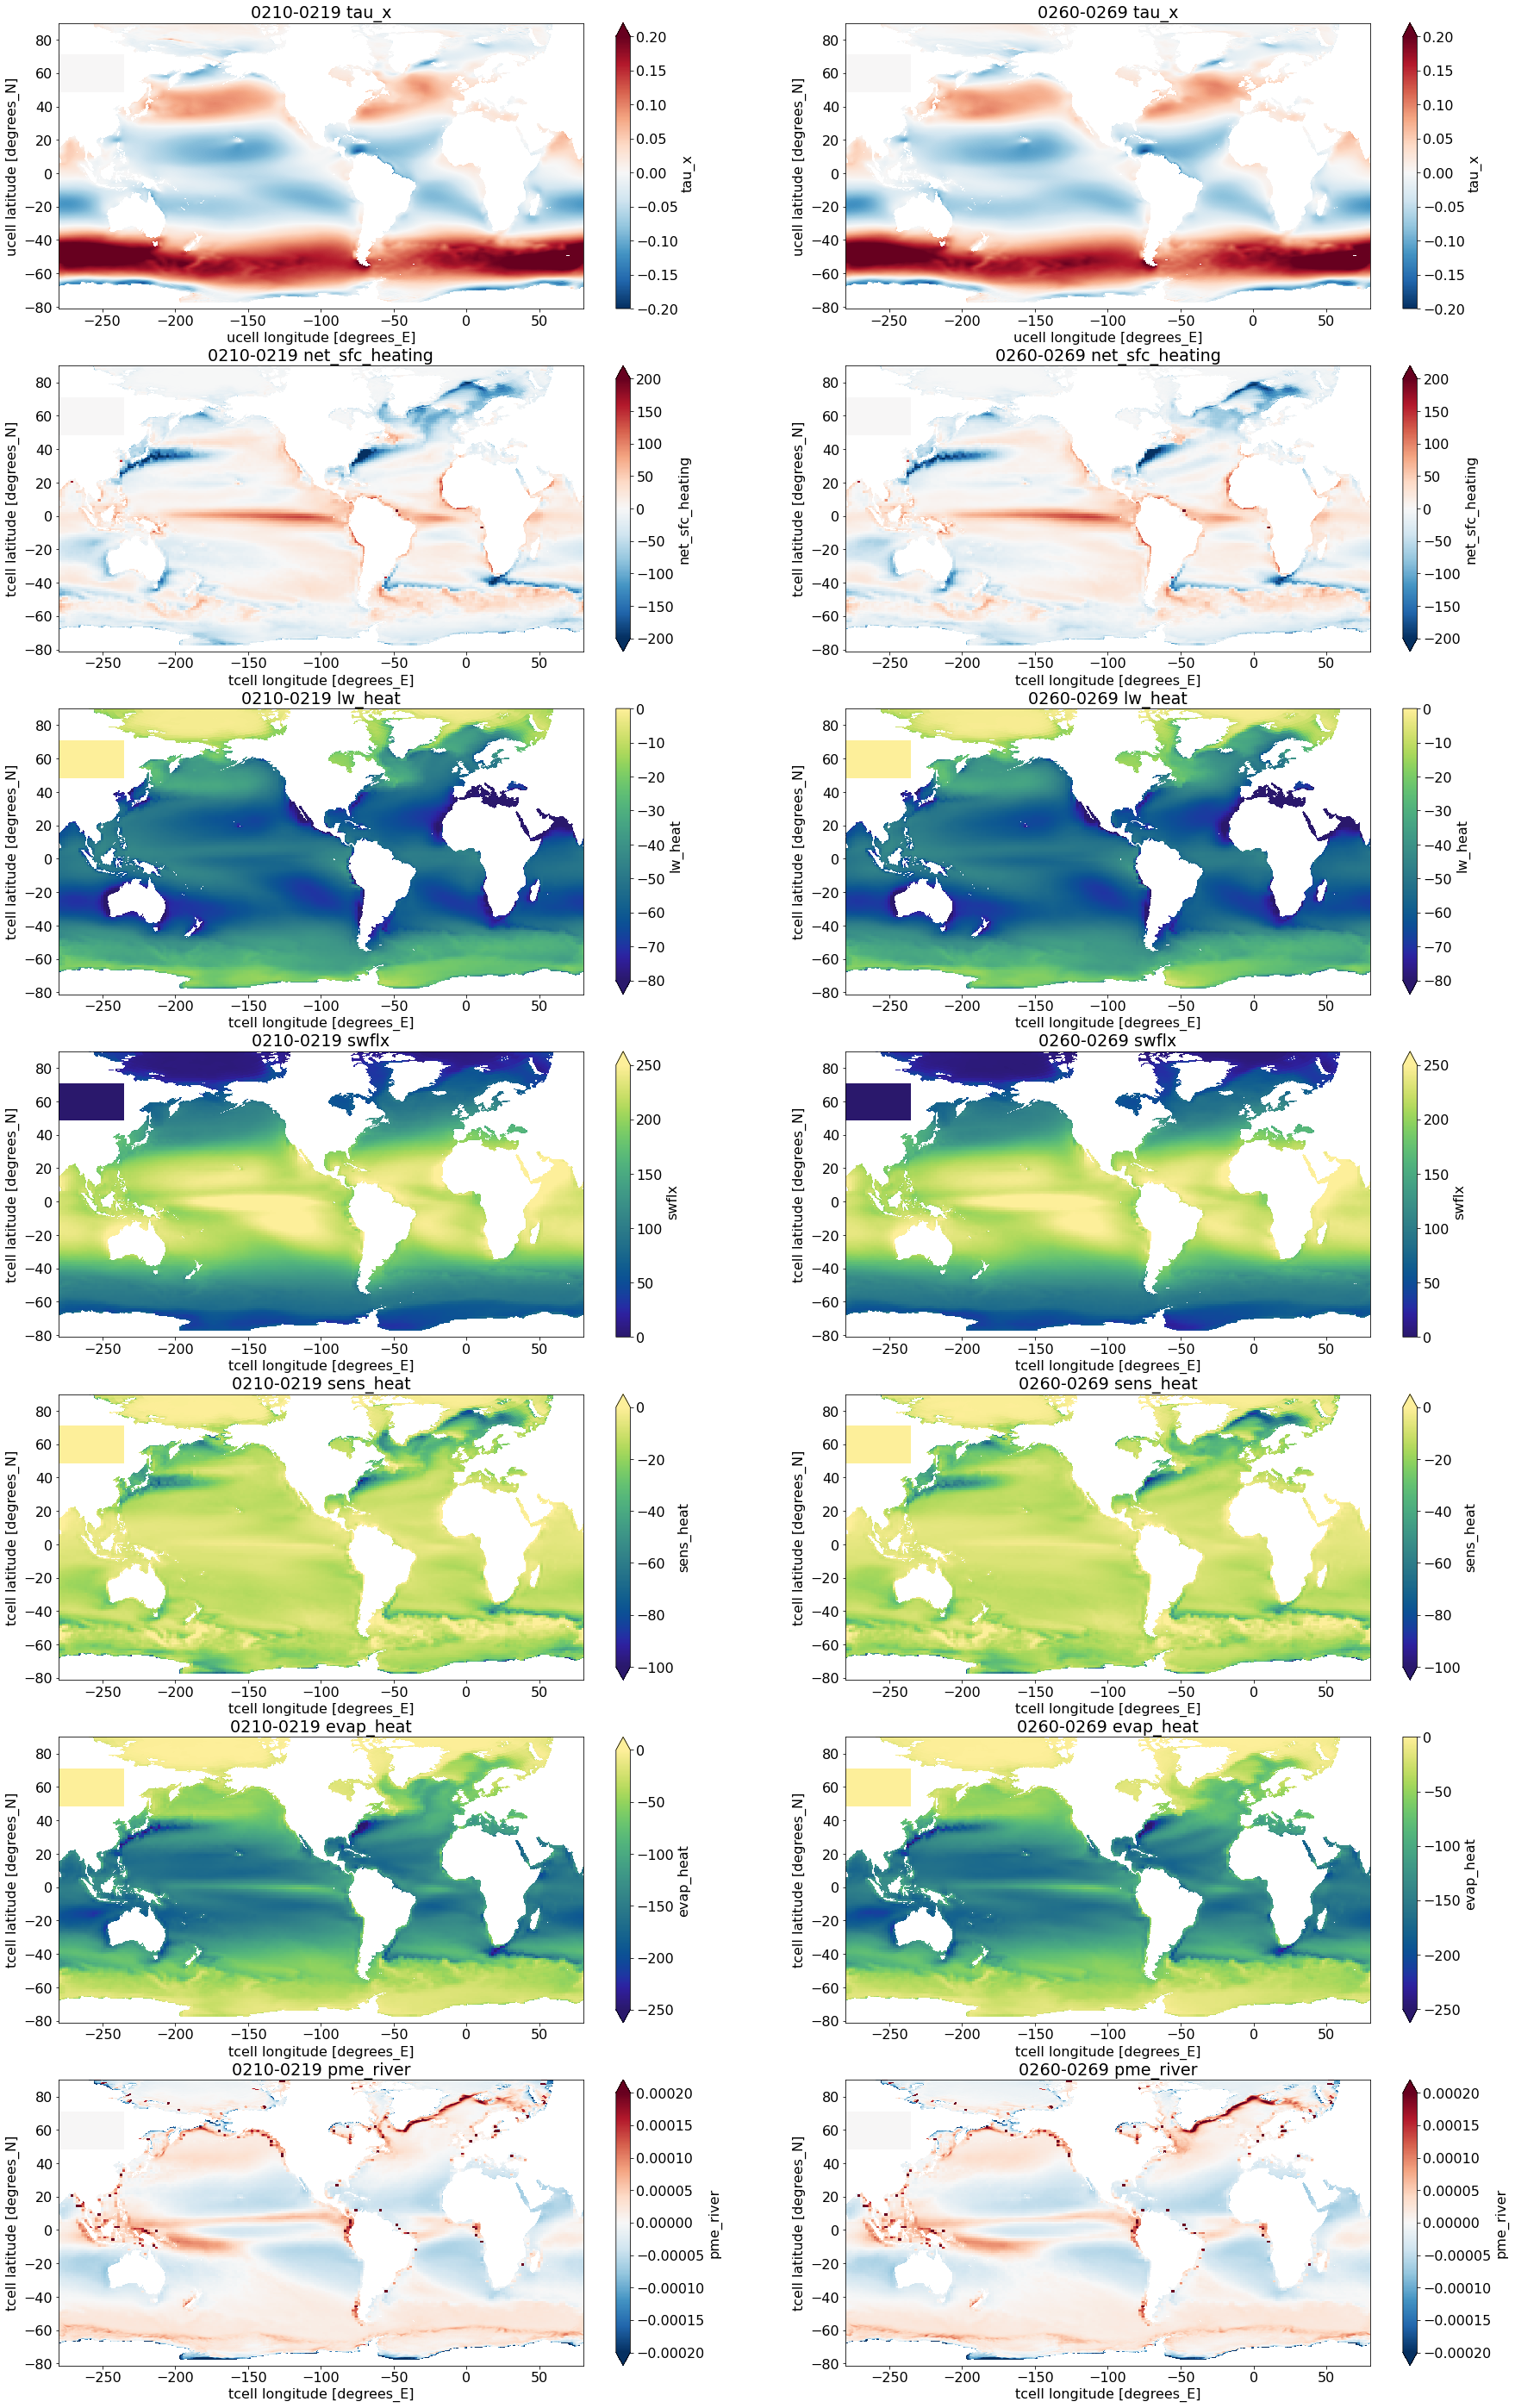

In [11]:
# Fluxes to plot
vs = {'tau_x':{'vmin':-0.2,'vmax': 0.2,'cmap':'RdBu_r'},
      'net_sfc_heating':{'vmin':-200.,'vmax': 200.,'cmap':'RdBu_r'},
      'lw_heat':{'vmin':-80.,'vmax': 0.,'cmap':cm.cm.haline},
      'swflx':{'vmin':0.,'vmax': 250.,'cmap':cm.cm.haline},
      'sens_heat':{'vmin':-100.,'vmax': 0.,'cmap':cm.cm.haline},
      'evap_heat':{'vmin':-250.,'vmax': 0.,'cmap':cm.cm.haline},
      'pme_river':{'vmin':-0.0002,'vmax': 0.0002,'cmap':'RdBu_r'}}   

expt_name = ['CM2-025', 'CM2-01', 'OM2-025', 'OM2-1']

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(30,50))
for i in range(2):
    start_year = ['0210', '0260']
    end_year   = ['0219', '0269']
    #times = ['0210-01-01', '0210-12-31']
    for j, v in enumerate(vs.keys()):
        print(start_year[i], '-', end_year[i], v)
        var = cc.querying.getvar(control, v, session_CM2, frequency='1 monthly').sel(time=slice(start_year[i] + '-01-01',end_year[i] + '-12-31')).mean('time')
        var.plot(ax=axes[j][i], vmin=vs[v]['vmin'], vmax=vs[v]['vmax'], cmap=vs[v]['cmap'])
        #axes[j][i].set_title(expt_name[i] + ' ' + v)
        axes[j][i].set_title(start_year[i] + '-' + end_year[i] + ' ' + v)

# rewrite to also plot difference

In [6]:
from cosima_cookbook import explore
dbx = explore.DatabaseExplorer(session=session_CM2)

In [7]:
dbx

DatabaseExplorer(children=(HTML(value='<style>.header p{ line-height: 1.4; margin-bottom: 10px }</style>\n    …